In [1]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

c:\Users\emili\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States') ].copy()

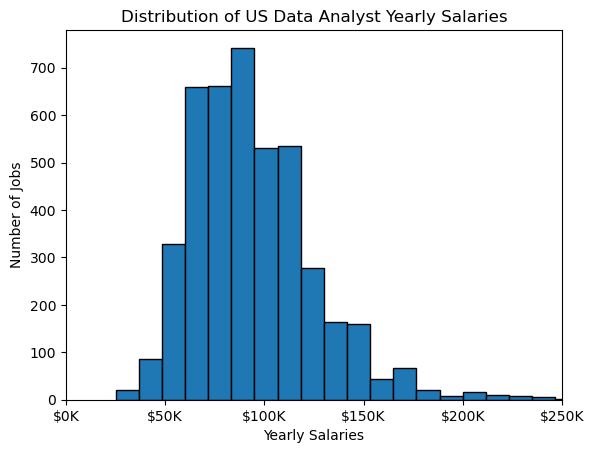

In [12]:
import matplotlib.ticker as mticker

df_DA_US['salary_year_avg'].plot(kind='hist',bins=30,edgecolor = 'black')
plt.xlim(0,250000)

ax = plt.gca()

# Formatting x-axis with commas
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))   # FuncFormatter

plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salaries')
plt.ylabel('Number of Jobs')
plt.show()
